In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("insurance.csv", sep=';')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,charges
0,-1.438764,0,-0.453320,0,0,16884.92400
1,-1.509965,0,0.509621,1,0,1725.55230
2,-0.797954,0,0.383307,3,0,4449.46200
3,-0.441948,0,-1.305531,0,0,21984.47061
4,-0.513149,0,-0.292556,0,0,3866.85520


<div class="alert alert-block alert-info">
📝 <b>Zadanie 1</b><br>
    Przygotuj dane:
    <ul>
    <li>Przekształć zmienne tekstowe na zmienne binarne lub kategoryczne</li>
    <li>Wystandaryzuj dane numeryczne</li>
    <li>Dokonaj podziału na zbiory treningowe i testowe</li>
    </ul></div>

In [ ]:
df["sex"]=df["sex"].apply(lambda x: 1 if x=="male" else 0)
df["smoker"]=df["smoker"].apply(lambda x: 1 if x=="yes" else 0)

In [ ]:
#or 
df2 = pd.get_dummies(df['sex'], drop_first = True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df[["age", "bmi", "children"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index = X.index, columns=X.columns)
X_scaled.head()

,age,bmi,children
0,-1.438764,-0.453320,-0.908614
1,-1.509965,0.509621,-0.078767
2,-0.797954,0.383307,1.580926
3,-0.441948,-1.305531,-0.908614
4,-0.513149,-0.292556,-0.908614


In [ ]:
df[["age","bmi", "children"]]=X_scaled

In [ ]:
df

,age,sex,bmi,children,smoker,charges
0,-1.438764,0,-0.453320,-0.908614,0,16884.92400
1,-1.509965,0,0.509621,-0.078767,0,1725.55230
2,-0.797954,0,0.383307,1.580926,0,4449.46200
3,-0.441948,0,-1.305531,-0.908614,0,21984.47061
4,-0.513149,0,-0.292556,-0.908614,0,3866.85520
...,...,...,...,...,...,...
1333,0.768473,0,0.050297,1.580926,0,10600.54830
1334,-1.509965,0,0.206139,-0.908614,0,2205.98080
1335,-1.509965,0,1.014878,-0.908614,0,1629.83350
1336,-1.296362,0,-0.797813,-0.908614,0,2007.94500


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop("charges", axis=1)
y = df["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div class="alert alert-block alert-info">
📝 <b>Zadanie 2.1</b><br>
Przygotuj estymator modelu perceptrona wielowarstwowego o poniższych cechach:
<ul>
<li>architektura składająca się z 2 warstw ukrytych:</li>
    <ul>
    <li>pierwsza warstwa ukryta o 128 neuronach</li>
    <li>druga warstwa ukryta o 64 neuronach</li>
    </ul>
<li>funkcja aktywacji dla warstw ukrytych: relu</li>
<li>optymalizator wag neuronów (solver): adam</li>
<li>maksymalna liczba iteracji: 1000</li>
<li>rozmiar wsadu (batch size): 64</li>
<li>ziarno losowości (random_state): 42</li>
</ul>
Wytrenuj model na wystandaryzowanych danych treningowych.
</div>

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
reg_model = MLPRegressor(
                        hidden_layer_sizes=(128, 64),
                        activation = 'relu',
                        solver = 'adam',
                        max_iter = 1000,
                        batch_size = 64,
                        random_state =42
                        )

In [ ]:
reg_model.fit(X_train, y_train)

MLPRegressor(batch_size=64, hidden_layer_sizes=(128, 64), max_iter=1000,
             random_state=42)

<div class="alert alert-block alert-info">
📝 <b>Zadanie 2.2</b><br>
Dokonaj prognozy zbioru testowego. Oblicz wartość współczynnika R2.</div>

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
y_pred = reg_model.predict(X_test)
r2_score(y_true = y_test, y_pred = y_pred)

0.14868406155379332

In [ ]:
mean_absolute_error(y_true = y_test, y_pred = y_pred)

9204.889746305167

<div class="alert alert-block alert-info">
<div class="alert alert-block alert-info">
📝 <b>Zadanie 3.1</b><br>
Korzystając z biblioteki tensorflow, przygotuj architekturę sieci neuronowej o poniższych cechach:
<ul>
<li>2 warstwy ukryte:</li>
    <ul>
    <li>pierwsza warstwa ukryta o 128 neuronach</li>
    <li>druga warstwa ukryta o 64 neuronach</li>
    </ul>
<li>funkcja aktywacji dla warstw ukrytych: relu</li>
</ul>
</div>
</div>

In [ ]:
from tensorflow.keras import models
from tensorflow.keras.layers import Dense

In [ ]:
model = models.Sequential()
model.add(Dense(units =128, activation = 'relu', input_shape =(X_train.shape[1], ))) #pierwsza warstwa ukryta
model.add(Dense(units =64, activation = 'relu')) #druga warstwa ukryta
model.add(Dense(units = 1)) # warstwa wyjsciowa

<div class="alert alert-block alert-info">
📝 <b>Zadanie 3.2</b><br>
Skompiluj model, wykorzystując:<br>
<ul>
    <li>optimizer (optymalizator wag neuronów, solver): <i>adam</i></li>
<li>funkcję straty: <i>mean_squared_error</i></li>
</ul>
</div>

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               768       
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


<div class="alert alert-block alert-info">
📝 <b>Zadanie 3.3</b><br>
Wytrenujmy powyższy model. Liczba epok równa 1000 i rozmiar batcha równy 64.
</div>

In [ ]:
model.fit(X_train, y_train, batch_size=64, epochs=1000)

Epoch 1/1000
17/17 [==============================] - 1s 3ms/step - loss: 322441760.0000 - mean_absolute_error: 13345.7236
Epoch 2/1000
17/17 [==============================] - 0s 2ms/step - loss: 322410880.0000 - mean_absolute_error: 13344.5615
Epoch 3/1000
17/17 [==============================] - 0s 2ms/step - loss: 322356384.0000 - mean_absolute_error: 13342.5137
Epoch 4/1000
17/17 [==============================] - 0s 2ms/step - loss: 322258688.0000 - mean_absolute_error: 13338.8779
Epoch 5/1000
17/17 [==============================] - 0s 2ms/step - loss: 322092000.0000 - mean_absolute_error: 13332.7852
Epoch 6/1000
17/17 [==============================] - 0s 4ms/step - loss: 321824768.0000 - mean_absolute_error: 13323.1191
Epoch 7/1000
17/17 [==============================] - 0s 2ms/step - loss: 321422144.0000 - mean_absolute_error: 13308.6631
Epoch 8/1000
17/17 [==============================] - 0s 2ms/step - loss: 320850720.0000 - mean_absolute_error: 13288.2646
Epoch 9/1000
17/

<div class="alert alert-block alert-info">
📝 <b>Zadanie 3.4</b><br>
Dokonaj prognozy zbioru testowego. Oblicz wartość współczynnika R2.</div>

In [ ]:
y_pred = model.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [ ]:
r2_score(y_true=y_test, y_pred=y_pred)

0.14819484525767435

In [ ]:
mean_absolute_error(y_true=y_test, y_pred=y_pred)

9187.12030984748

#Walidacja

In [ ]:
model = models.Sequential()
model.add(Dense(units =128, activation = 'relu', input_shape =(X_train.shape[1], ))) #pierwsza warstwa ukryta
model.add(Dense(units =64, activation = 'relu')) #druga warstwa ukryta
model.add(Dense(units = 1)) # warstwa wyjsciowa

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [ ]:
model_hist = model.fit(X_train, y_train, batch_size=64, epochs=1000, verbose=0)

In [ ]:
model_hist.history.keys()

dict_keys(['loss', 'mean_absolute_error'])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
epochs = 1000

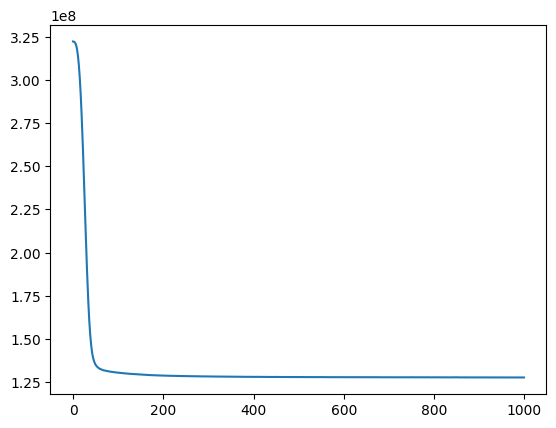

In [ ]:
plt.plot(list(range(epochs)), model_hist.history['loss'])
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
model = models.Sequential()
model.add(Dense(units =128, activation = 'relu', input_shape =(X_train.shape[1], ))) #pierwsza warstwa ukryta
model.add(Dense(units =64, activation = 'relu')) #druga warstwa ukryta
model.add(Dense(units = 1)) # warstwa wyjsciowa

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [ ]:
model_hist = model.fit(X_train, y_train, batch_size=64, epochs=1000, verbose=0, validation_data=(X_val, y_val))

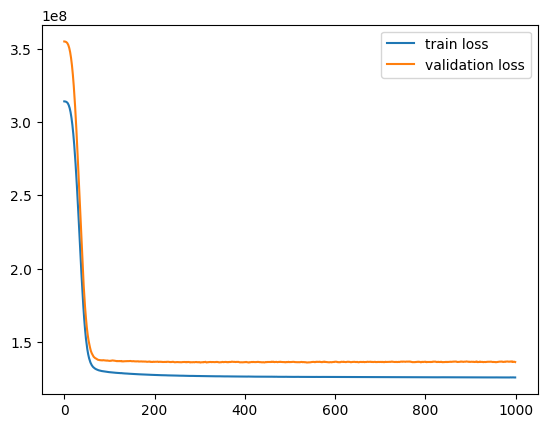

In [ ]:
plt.plot(list(range(epochs)), model_hist.history['loss'], label='train loss')
plt.plot(list(range(epochs)), model_hist.history['val_loss'], label='validation loss')
plt.legend()
plt.show()